In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

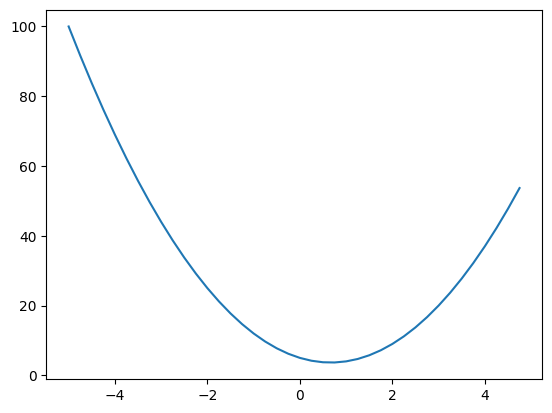

In [4]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [5]:
h = 0.0000001
x = 2/3
(f(x+h) - f(x)) / h

2.9753977059954195e-07

dx = 6x-4
x=3
dx =14

In [6]:
a = 2 
b = -3
c = 10
d = a*b+c
print(d)

4


In [7]:
h = 0.0001

a = 2
b = -3
c = 10
d1 = a*b+c
b+=h
d2 = a*b+c
print('d1', d1)
print('d2', d2) 
print('slope', (d2-d1)/h)

d1 4
d2 4.0002
slope 2.0000000000042206


In [37]:
from src.engine import Value
from src.visualization import draw_dot

In [16]:
a = Value(2, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')
e = a*b
e.label = 'e'
d = e+c
d.label = 'd'
f = Value(-2, label='f')
L = d*f
L.label = 'L'


manual

In [30]:
L.grad = 1
f.grad = d.data * L.grad
d.grad = f.data * L.grad
c.grad = 1 * d.grad
e.grad = 1 * d.grad
b.grad = a.data * e.grad
a.grad = b.data * e.grad

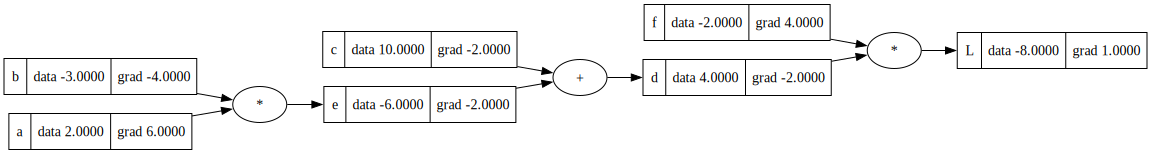

In [31]:
draw_dot(L)

In [35]:
def lol():
    h = 0.001
    a = Value(2, label='a')
    b = Value(-3, label='b')
    c = Value(10, label='c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    f = Value(-2, label='f')
    L = d*f
    L1 = L.data

    a = Value(2, label='a')
    a.data += h
    b = Value(-3, label='b')
    # b.data += h
    c = Value(10, label='c')
    # c.data += h
    e = a*b
    e.label = 'e'
    # e.data += h
    d = e+c 
    d.label = 'd'
    # d.data += h
    f = Value(-2, label='f')
    L = d*f
    L2 = L.data

    print ((L2-L1) / h)

lol()

6.000000000000227


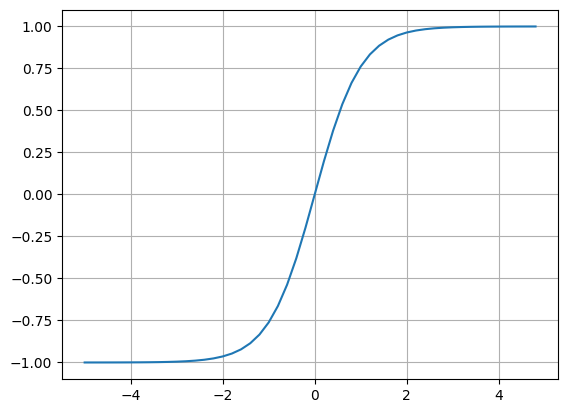

In [28]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

In [41]:
x1 = Value(2, label='x1')
x2 = Value(0, label='x2')

w1 = Value(-3, label='w1')
w2 = Value(1, label='w2')

b = Value(6.8813, label='b')
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2+b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [46]:
o.grad = 1
n.grad = o.grad * (1 - o.data**2)
b.grad = 1 * n.grad
x1w1x2w2.grad = 1 * n.grad
x2w2.grad = 1 * x1w1x2w2.grad
x1w1.grad = 1 * x1w1x2w2.grad
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad


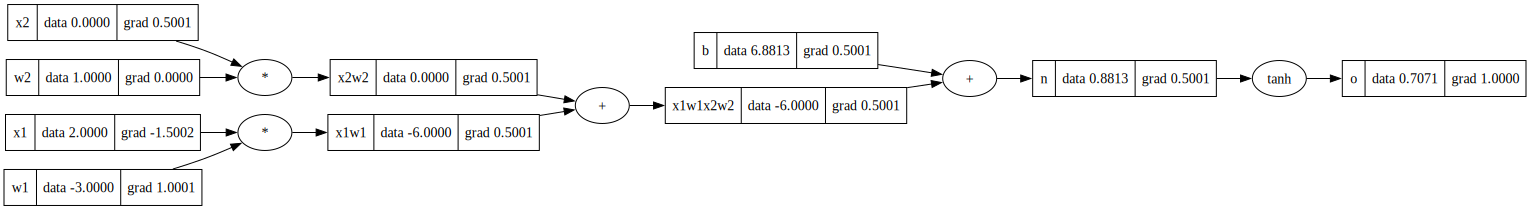

In [47]:
draw_dot(o)